# 1 Wisconsin Breast Cancer Data

### Step 1: Read the data

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
variable_names=["V"+str(i) for i in range(1, 10)]
col_names=['Id']
col_names += variable_names
col_names.append('Class')

In [3]:
rawdata = pd.read_csv('session4_homework.csv',names=col_names)

In [4]:
np.count_nonzero(rawdata=='?') #Some observations have missing values “?”.

16

In [5]:
rawdata.shape #total dimension of the dataset

(699, 11)

In [6]:
np.count_nonzero(rawdata.Class==4)/rawdata.shape[0] #the ratio of malignant diagnoses

0.3447782546494993

In [7]:
# Because some of the values are '?', I choose to just replace them to na when reading the file.
# So that all the variables are int type.
data = pd.read_csv('session4_homework.csv',names=col_names,na_values='?')
#delete all the na rows
data = data.dropna()

### Step 2: Fit classification tree

To graph the tree, I also use graphviz.

I use the conda package manager, the graphviz binaries and the python package can be installed with

conda install python-graphviz

In [8]:
clf = tree.DecisionTreeClassifier( )
clf = clf.fit(data[variable_names], data.Class)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=variable_names,  
                         class_names=['2','4'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

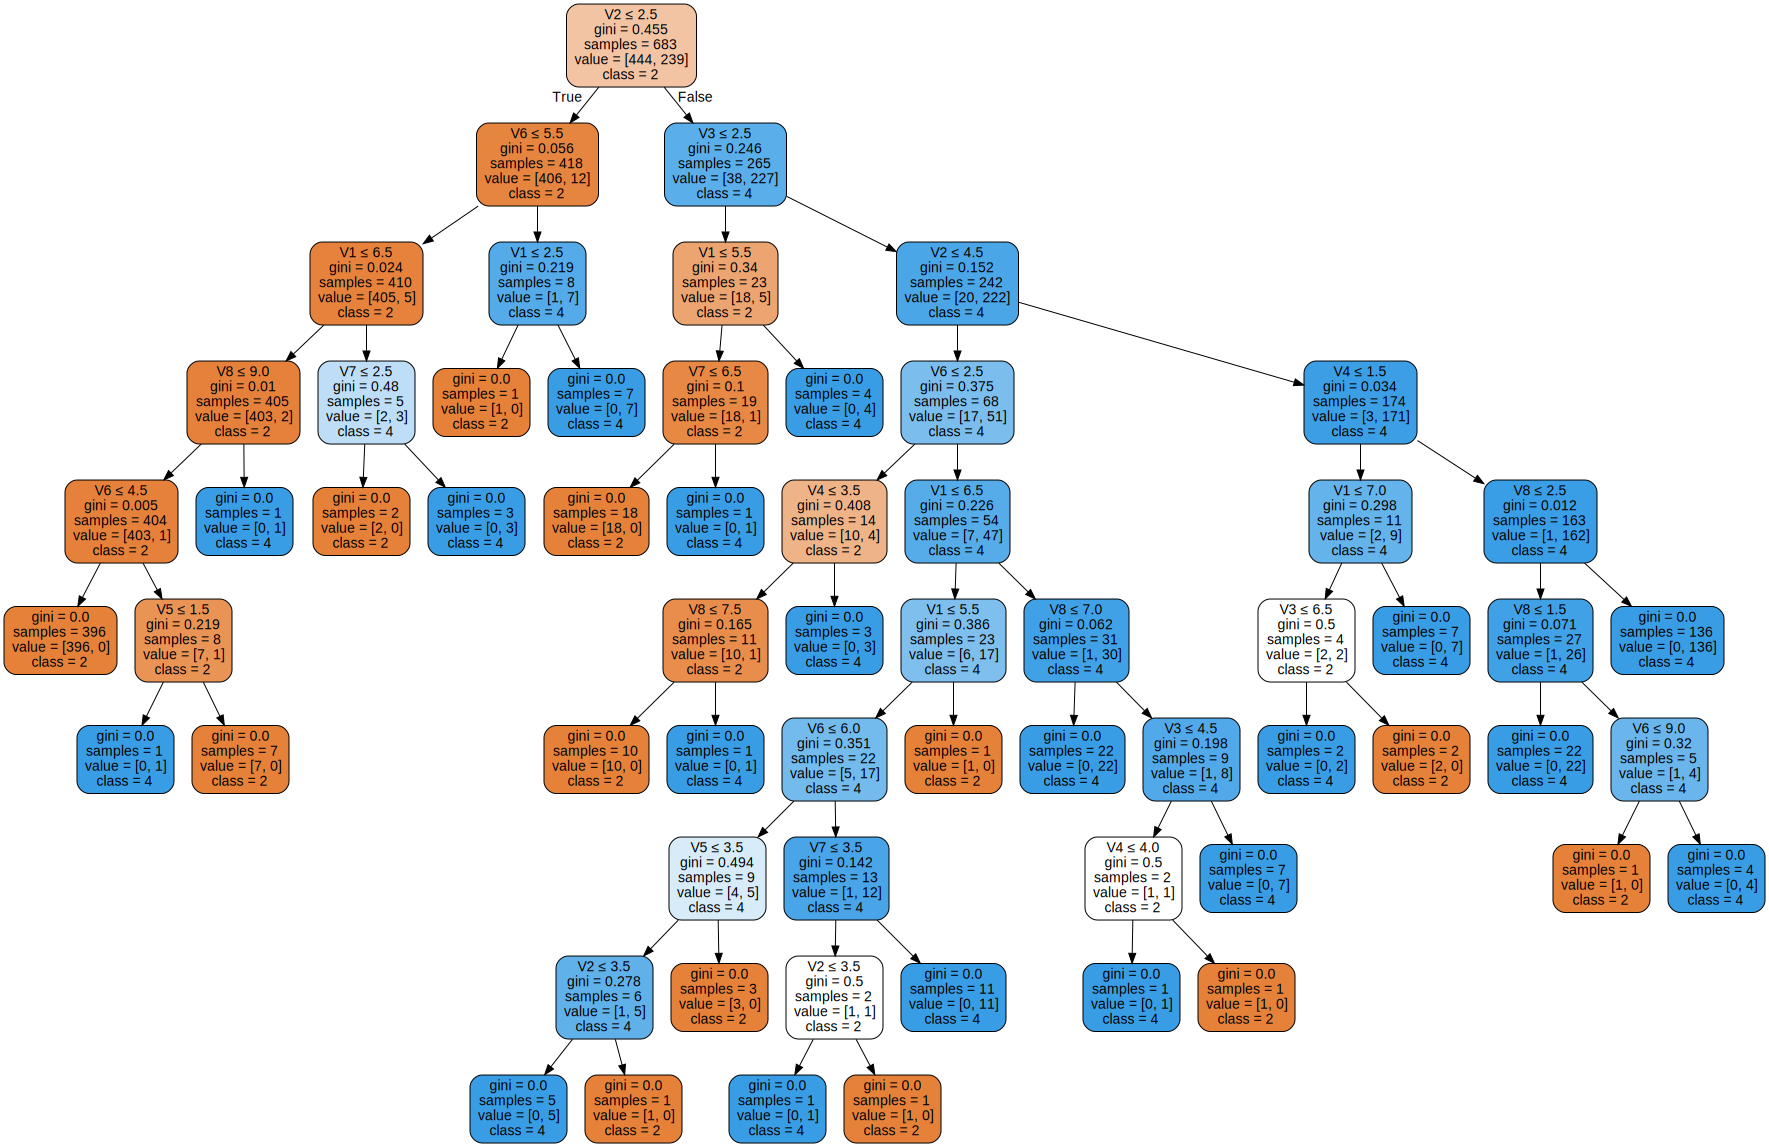

In [10]:
graph #We can see the tree is huge and maybe overfitting

### Step 3: Prune the tree

Use grid search to find a possible best hyper parameter sets.

In [11]:
param_grid = {
              "max_depth": [3, 4, 5, 6],
              "min_samples_leaf": [5, 7, 10],
              "max_leaf_nodes": [None, 10, 20]
              }

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf,param_grid=param_grid,cv=5,return_train_score=False)

grid_search.fit(data[variable_names], data.Class)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [5, 7, 10], 'max_leaf_nodes': [None, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [12]:
result = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
result.head()

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
18,0.001601,0.000404,0.951684,5,None,5,"{'max_depth': 5, 'max_leaf_nodes': None, 'min_...",1,0.934307,0.934307,0.963504,0.992701,0.933333,0.000786,0.000202,0.023520
12,0.001105,0.000300,0.951684,4,10,5,"{'max_depth': 4, 'max_leaf_nodes': 10, 'min_sa...",1,0.934307,0.934307,0.963504,0.992701,0.933333,0.000201,0.000246,0.023520
24,0.001307,0.000688,0.950220,5,20,5,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...",3,0.934307,0.934307,0.963504,0.985401,0.933333,0.000233,0.000500,0.021015
33,0.001208,0.000398,0.950220,6,20,5,"{'max_depth': 6, 'max_leaf_nodes': 20, 'min_sa...",3,0.934307,0.934307,0.963504,0.970803,0.948148,0.000245,0.000199,0.014927
15,0.001004,0.000401,0.950220,4,20,5,"{'max_depth': 4, 'max_leaf_nodes': 20, 'min_sa...",3,0.934307,0.934307,0.963504,0.985401,0.933333,0.000001,0.000200,0.021015


In [13]:
grid_search.best_params_

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 5}

In [14]:
clf = grid_search.best_estimator_

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=variable_names,  
                         class_names=['2','4'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

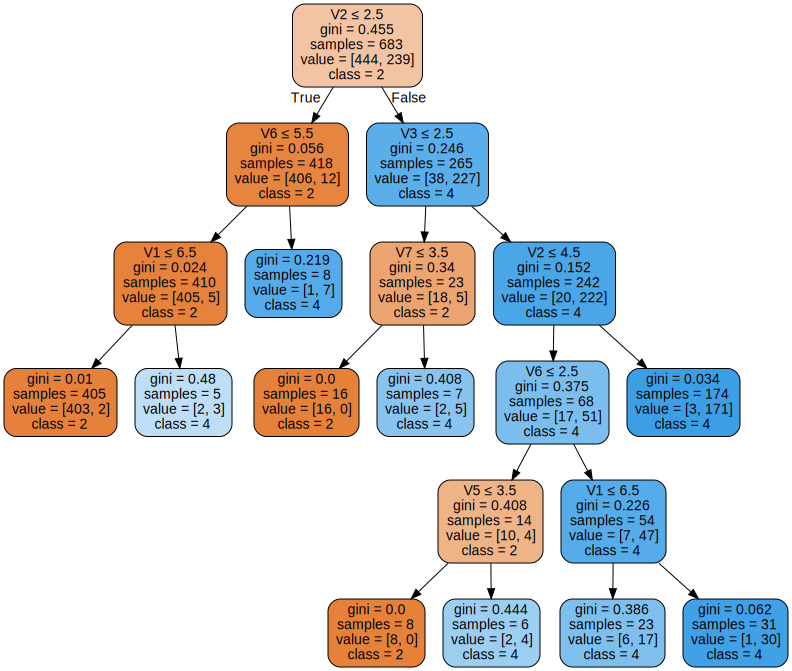

In [16]:
graph

### Step4: Comment the trees and calculate probabilities

Because of the difference of those hyperparameters like max_depth, max_leaf_nodes and min_samples_leaf,  we can get a different tree. Using grid search can somewhat improve the result but can not test all the combinations. 

And the result of the grid search seems quite random. Different randomly seperation of K-Fold Cross Validation used in the function can produce very different results of the values of the parameters. But the first three nodes basically unchanged.

Observe the tree above, to avoid overfitting problems, we can set the parameters to make the tree has not too many leaves and not too deep.

And based on the tree, we can make predictions using data and answer some "if-then judgement questions".

### calculate probabilities

Since the tree has a different classification, these probabilities are calculated from original dataset.

In [17]:
E1 = rawdata[(rawdata.V2>=2.5)& (rawdata.V3>=2.5) & ~(rawdata.V6.isin(['?','1','2']))]

In [18]:
E1.shape[0]/rawdata.shape[0]

0.30185979971387694

* P(E1) = 0.30185979971387694

In [19]:
E1[E1.Class==4].shape[0]/E1.shape[0]

0.95260663507109

* P(4|E1) = 0.95260663507109

In [20]:
EV6_2 = rawdata[rawdata.V6=='2']

In [21]:
EV6_2[EV6_2.Class == 4].shape[0]/EV6_2.shape[0]

0.3

* P(4|E(V6=2)) = 0.3

In [22]:
EV3_3 = rawdata[rawdata.V3==3]

In [23]:
EV3_3[EV3_3.Class == 4].shape[0]/EV3_3.shape[0]

0.4107142857142857

* P(4|E(V3=3)) = 0.4107142857142857

In [24]:
E4 = rawdata[rawdata.Class == 4]

In [25]:
E4[(E4.V2>=2.5)& (E4.V3>=2.5) & ~(E4.V6.isin(['?','1','2']))].shape[0]/E4.shape[0]

0.8340248962655602

* P(E1|4) = 0.8340248962655602

# 2 Time series of stock prices

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [27]:
# calculate the log return

stkdata = pd.read_csv('session4_spyPortfolio.csv')
ret_data = np.log(stkdata).diff(1)

In [28]:
# shift the SPY return before 1 day as target

X = ret_data.iloc[1:,:-1]
Y = ret_data['SPY.A'].shift(-1).dropna()

It seems that in the instruction, x is not standardized. 

Maybe it does not matter so much in this case, because the range of each variable is similar.

In [29]:
#standardized_x = scale(X)

pca = PCA().fit(X)

In [30]:
def screeplot(pca, x_values):
    y = np.std(pca.transform(x_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.figure(figsize = (8,6))
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

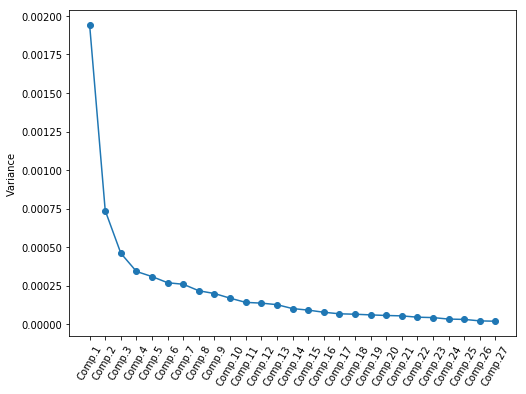

In [31]:
screeplot(pca, X)

From the graph, we can see that the first ten priciple components are good enough to explain.

In [32]:
PC = pd.DataFrame(pca.transform(X),columns=["PC"+str(i) for i in range(1, len(X.columns)+1)])
PC_use = PC.iloc[:,:10]

In [33]:
param_grid2 = {
              "max_depth": [3, 4, 5, 6],
              "max_leaf_nodes": [None, 10, 15, 20]
              }

clf2 = tree.DecisionTreeRegressor()

grid_search2 = GridSearchCV(clf2, param_grid=param_grid2, cv=5,return_train_score=True)

grid_search2.fit(PC_use, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6], 'max_leaf_nodes': [None, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
result2 = pd.DataFrame(grid_search2.cv_results_).sort_values('rank_test_score')
result2.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_leaf_nodes,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,0.001604,0.000501,0.802060,0.914031,3,20,"{'max_depth': 3, 'max_leaf_nodes': 20}",1,0.831586,0.909125,...,0.798223,0.918449,0.785279,0.903623,0.785221,0.925121,0.000200,0.000317,0.017404,0.007415
2,0.001303,0.000200,0.793222,0.913121,3,15,"{'max_depth': 3, 'max_leaf_nodes': 15}",2,0.823173,0.907198,...,0.798223,0.918223,0.785279,0.903623,0.763730,0.924857,0.000245,0.000245,0.019293,0.007630
7,0.001710,0.000697,0.789810,0.935725,4,20,"{'max_depth': 4, 'max_leaf_nodes': 20}",3,0.846163,0.930016,...,0.790020,0.941718,0.765719,0.926460,0.751629,0.945242,0.000763,0.000502,0.032393,0.007003
4,0.001505,0.000802,0.787650,0.914031,4,None,"{'max_depth': 4, 'max_leaf_nodes': None}",4,0.831586,0.909125,...,0.798223,0.918449,0.785279,0.903623,0.738241,0.925121,0.000001,0.000601,0.029989,0.007415
15,0.001704,0.000504,0.784793,0.937658,6,20,"{'max_depth': 6, 'max_leaf_nodes': 20}",5,0.841156,0.930076,...,0.790623,0.944661,0.788129,0.930266,0.755747,0.948004,0.000680,0.000321,0.032853,0.007401


In [35]:
grid_search2.best_params_

{'max_depth': 3, 'max_leaf_nodes': 20}

In [36]:
clf2 = grid_search2.best_estimator_

In [37]:
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=PC_use.columns,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data2)

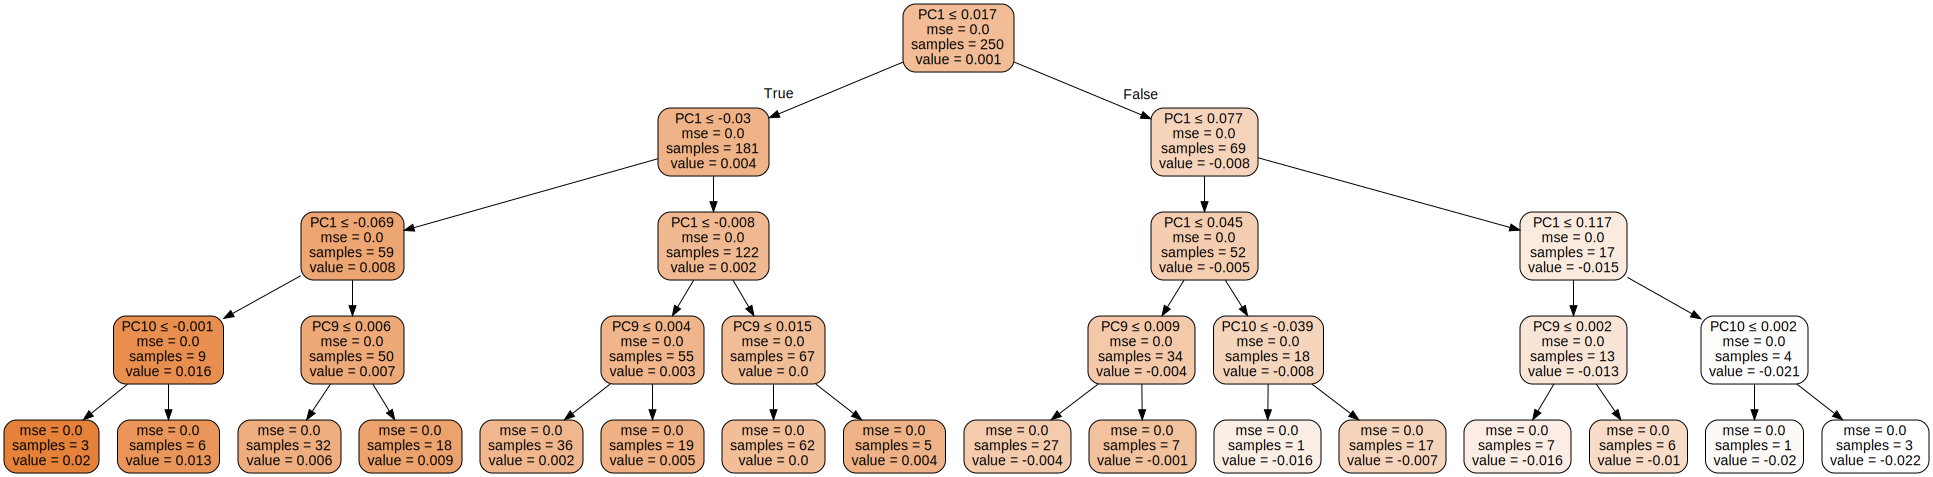

In [38]:
graph

Notice that we can basically make predictions based on the value of the first principle component. The division of the first component is similar to the homework instruction.

One interesting and a bit confusing thing is PC9 is used as classification instead of PC2. I have tried regress with 2 PCs or 5 PCs and more than 10 PCs. It turns out that only regressing with PC1 and PC2, PC2 is used to classify (obviously...).

Regression with 5 PCs : PC3 and PC4 are used to classify besides PC1.

Regression with more than 10 PCs, the result is similar to the tree above.

If we want to make predictions based on this decision tree, we can get all the stock return data today, and multiple them with loadings calculated by PCA. We can get PC1, PC2, etc. 

Then we can just observe the tree and make rough predictions by making if-then judgements.

Or we can just use predict function  provided by sklearn.tree to make a kind of more precise prediction shown below.

In [39]:
y_pre = clf2.predict(PC_use)

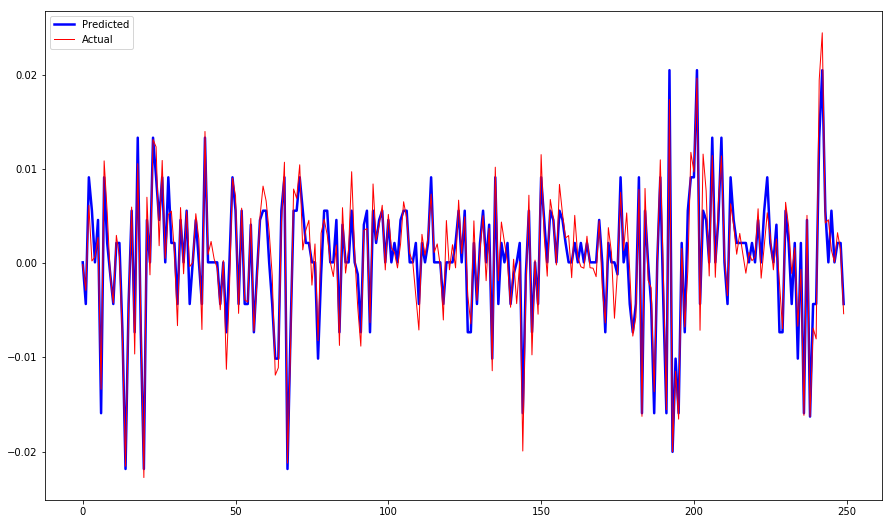

In [40]:
plt.figure(figsize=(15,9))
plt.plot(y_pre, 'b', label = 'Predicted', linewidth =2.5)
plt.plot(Y, 'r', label = 'Actual', linewidth =1)
plt.legend()
plt.show()